In [1]:
#!pip install stop-words
#!pip install keras
#!pip install tensorflow
#!pip install plotly
#!pip install keras-self-attention
#!pip install attention

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import string
import nltk
from collections import Counter
import re
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from random import shuffle
#nltk.download()
string.punctuation

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Exploratory Data Analysis and Data Pre-Processing

English Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
!ls "/content/drive/My Drive/project/"

 ces.txt
'Copy of Eng-Cs.ipynb'
'Copy of NeuralMachineTranslation (6).ipynb'
 deu.txt
'Eng-Cs (1).ipynb'
 Eng-Cs.ipynb
 Eng_Cs_new.ipynb
'Eng-De (1).ipynb'
 Eng-De.ipynb
'NeuralMachineTranslation (6).ipynb'
 NMT_marathi.ipynb
 stopwords-cs.txt


In [5]:
#Dataset
file = "/content/drive/My Drive/project/ces.txt"

In [6]:
with open (file, 'r', encoding = 'utf-8') as f: 
  data = f.read().split('\n')
len(data)

24556

In [7]:
data = data[:24555]

In [8]:
input_texts = []
target_texts = []
for line in data:
  input_texts.append(line.split('\t')[:-1][0])
  target_texts.append(line.split('\t')[:-1][1])

In [9]:
len(input_texts), len(target_texts)

(24555, 24555)

In [10]:
input_texts[111]

'I like it.'

In [11]:
target_texts[111]

'Mám to rád.'

In [12]:
df = pd.DataFrame(columns=['English', 'Czech'])
df['English'] = input_texts
df['Czech'] = target_texts
df.to_csv('English_Czech.csv', index=False)
df

,English,Czech
0,Hi.,Ahoj!
1,Run!,Běž!
2,Run!,Utíkej!
3,Who?,Kdo?
4,Wow!,Páni!
...,...,...
24550,I honestly think it's better to be a failure a...,"Upřímně si myslím, že je lepší pohořet na něče..."
24551,"When Tom was working on the dairy farm, he had...","Když Tom pracoval na mléčném statku, musel vst..."
24552,Tom was sad when he discovered that Mary was a...,"Tom byl smutný, když objevil, že Mary je zlato..."
24553,He was caught by the police three days later t...,"Byl dopaden policií o tři dny později, když se..."


In [13]:
eng_data =df.English

In [14]:
print("Total number of records for English dataset: ",len(eng_data))

Total number of records for English dataset:  24555


In [15]:
count_eng_words = [word for sentence in eng_data for word in sentence.split()]

In [16]:
eng_words =len(count_eng_words)
print("Number of English words:",eng_words)

Number of English words: 149379


In [17]:
unique_eng_words=len(Counter(count_eng_words))
print("Number of unique English words:", unique_eng_words)

Number of unique English words: 10081


In [18]:
common = Counter(count_eng_words).most_common(10)
print("Most common words in English dataset:", common)

Most common words in English dataset: [('Tom', 6340), ('I', 6245), ('to', 5727), ('the', 3608), ('you', 3083), ('a', 2998), ('is', 2541), ('that', 1524), ('was', 1380), ('in', 1348)]


Czech Dataset

In [19]:
cs_data =df.Czech

In [20]:
print("Total number of records for Czech dataset: ",len(cs_data))

Total number of records for Czech dataset:  24555


In [21]:
count_cs_words = [word for sentence in cs_data for word in sentence.split()]

In [22]:
cs_words =len(count_cs_words)
print("Number of Czech words:",cs_words)

Number of Czech words: 122486


In [23]:
unique_cs_words=len(Counter(count_cs_words))
print("Number of unique Czech words:", unique_cs_words)

Number of unique Czech words: 21899


In [24]:
common = Counter(count_cs_words).most_common(10)
print("Most common words in Czech dataset:", common)

Most common words in Czech dataset: [('Tom', 5453), ('se', 3365), ('to', 2539), ('že', 2364), ('je', 2205), ('jsem', 2151), ('na', 1638), ('si', 1278), ('v', 887), ('mi', 865)]


In [25]:
# length of message excluding space
length = df.copy()
length['body_length_English'] = length['English'].apply(lambda x: len(str(x)) - (str(x).count(" ")))
length['body_length_Czech'] = length['Czech'].apply(lambda x: len(str(x)) - (str(x).count(" ")))
length

,English,Czech,body_length_English,body_length_Czech
0,Hi.,Ahoj!,3,5
1,Run!,Běž!,4,4
2,Run!,Utíkej!,4,7
3,Who?,Kdo?,4,4
4,Wow!,Páni!,4,5
...,...,...,...,...
24550,I honestly think it's better to be a failure a...,"Upřímně si myslím, že je lepší pohořet na něče...",89,76
24551,"When Tom was working on the dairy farm, he had...","Když Tom pracoval na mléčném statku, musel vst...",88,73
24552,Tom was sad when he discovered that Mary was a...,"Tom byl smutný, když objevil, že Mary je zlato...",92,86
24553,He was caught by the police three days later t...,"Byl dopaden policií o tři dny později, když se...",94,110


In [26]:
#Histogram for Length
x1 = length.body_length_English
x2 = length.body_length_Czech
# Group data together
hist_data = [x1, x2]
group_labels = ['Length English', 'Length Czech']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0, 5, 10])
fig.show()

In [27]:
# % of punctuation excluding space
punct = df.copy()
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100 if count !=0 else 0
punct['punctuation_English'] = punct['English'].apply(lambda x: count_punct(str(x)))
punct['punctuation_Czech'] = punct['Czech'].apply(lambda x: count_punct(str(x)))
punct.head(10)

,English,Czech,punctuation_English,punctuation_Czech
0,Hi.,Ahoj!,33.3,20.0
1,Run!,Běž!,25.0,25.0
2,Run!,Utíkej!,25.0,14.3
3,Who?,Kdo?,25.0,25.0
4,Wow!,Páni!,25.0,20.0
5,Fire!,Hoří!,20.0,20.0
6,Fire!,Oheň!,20.0,20.0
7,Hello!,Ahoj!,16.7,20.0
8,Hurry!,Pospěš si!,16.7,11.1
9,Hurry!,Dělej!,16.7,16.7


In [28]:
# Histogram for punctuation
x1 = punct.punctuation_English
x2 = punct.punctuation_Czech
# Group data together
hist_data = [x1, x2]
group_labels = ['Punctuation English', 'Punctuation Czech']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0, 5, 10])
fig.show()

In [29]:
#Check max length of sentence before cleaning
eng_length = []
cs_length = []
for i in df.English:
    eng_length.append(len(i.split(' ')))
eng_max_length = max(eng_length)
for i in df.Czech:
    cs_length.append(len(i.split(' ')))
cs_max_length = max(cs_length)
print("Maximum length of English sentence:", eng_max_length)
print("Maximum length of Czech sentence:", cs_max_length)

Maximum length of English sentence: 26
Maximum length of Czech sentence: 22


In [30]:
#Check random raw before cleaning
review_Eng= df.iloc[24552]
review_Cs = df.iloc[24552]
print(review_Eng['English'])
print(review_Cs['Czech'])

Tom was sad when he discovered that Mary was a gold digger and Mary was sad when she discovered that Tom was poor.
Tom byl smutný, když objevil, že Mary je zlatokopka, a Mary byla smutná, když objevila, že Tom je chudý.


In [31]:
#Convert words to lower case
df.English = df.English.apply(lambda x: x.lower())
df.Czech = df.Czech.apply(lambda x: x.lower())

In [32]:
#Remove quotation marks
df.English = df.English.apply(lambda x: re.sub("'", "", x))
df.Czech = df.Czech.apply(lambda x: re.sub("'", "", x))

In [33]:
#Remove digits
remove_digits = str.maketrans("","", string.digits)
df.English = df.English.apply(lambda x: x.translate(remove_digits))
df.Czech = df.Czech.apply(lambda x: x.translate(remove_digits))

In [34]:
#Remove punctuation
remove = re.sub(r'\W', ' ', str(""))

In [35]:
#Function to remove punctuation
def remove_punct(text):
    remove = re.sub(r'\W',' ', str(text))
    return remove

df.English = df.English.apply(lambda x: remove_punct(x))
df.Czech = df.Czech.apply(lambda x: remove_punct(x))
df

,English,Czech
0,hi,ahoj
1,run,běž
2,run,utíkej
3,who,kdo
4,wow,páni
...,...,...
24550,i honestly think its better to be a failure at...,upřímně si myslím že je lepší pohořet na něče...
24551,when tom was working on the dairy farm he had...,když tom pracoval na mléčném statku musel vst...
24552,tom was sad when he discovered that mary was a...,tom byl smutný když objevil že mary je zlato...
24553,he was caught by the police three days later t...,byl dopaden policií o tři dny později když se...


In [36]:
#check the same raws after cleaning
review_Eng= df.iloc[24552]
review_Cs = df.iloc[24552]
print(review_Eng['English'])
print(review_Cs['Czech'])

tom was sad when he discovered that mary was a gold digger and mary was sad when she discovered that tom was poor 
tom byl smutný  když objevil  že mary je zlatokopka  a mary byla smutná  když objevila  že tom je chudý 


In [37]:
#Remove spaces which we got after removing punctuation
df.English = df.English.apply(lambda x: x.strip())
df.English = df.English.apply(lambda x: re.sub(" +", " ", x))
df.Czech = df.Czech.apply(lambda x: x.strip())
df.Czech = df.Czech.apply(lambda x: re.sub(" +", " ", x))
df

,English,Czech
0,hi,ahoj
1,run,běž
2,run,utíkej
3,who,kdo
4,wow,páni
...,...,...
24550,i honestly think its better to be a failure at...,upřímně si myslím že je lepší pohořet na něčem...
24551,when tom was working on the dairy farm he had ...,když tom pracoval na mléčném statku musel vstá...
24552,tom was sad when he discovered that mary was a...,tom byl smutný když objevil že mary je zlatoko...
24553,he was caught by the police three days later t...,byl dopaden policií o tři dny později když se ...


In [38]:
#check the same raws after removing spaces
review_Eng= df.iloc[24552]
review_Cs = df.iloc[24552]
print(review_Eng['English'])
print(review_Cs['Czech'])

tom was sad when he discovered that mary was a gold digger and mary was sad when she discovered that tom was poor
tom byl smutný když objevil že mary je zlatokopka a mary byla smutná když objevila že tom je chudý


  English words  Frequency
0           tom       7022
1          dont       1310
2          mary        981
3            im        953
4          know        883
5          like        872
6          want        805
7         didnt        690
8            go        516
9         think        481


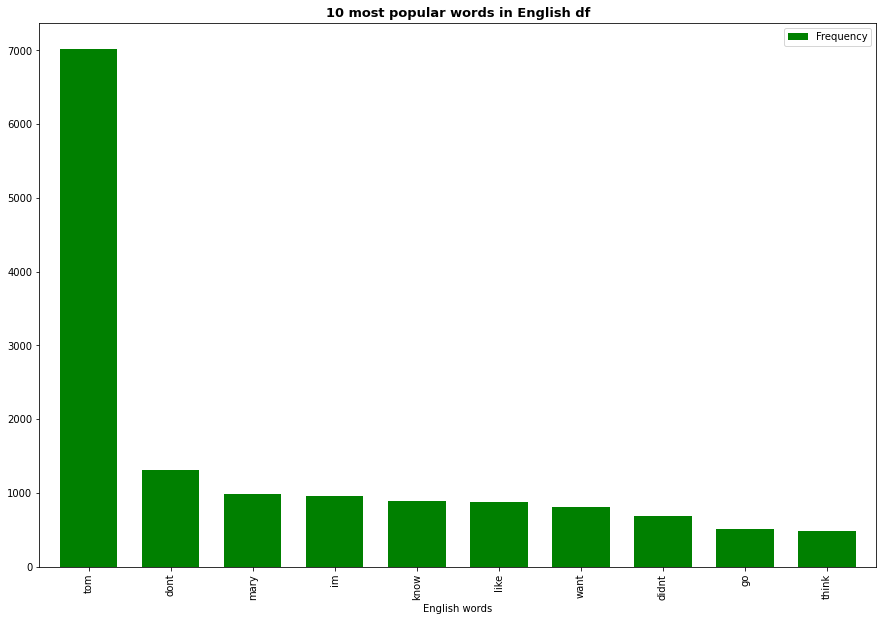

In [39]:
#Plot 10 most popular words in English dataframe after cleaning
number_top_words = 10
eng_stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
re_eng_stopwords = r'\b(?:{})\b'.format('|'.join(eng_stopwords))
# replace '|'-->' ' and drop all stopwords
eng_words = (df.English
             .str.lower()
           .replace([r'\|', re_eng_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)
eng_df = pd.DataFrame(Counter(eng_words).most_common(number_top_words), columns=['English words', 'Frequency'])
print(eng_df)
eng_df.set_index('English words').plot(kind='bar', figsize = (15, 10), width = 0.7, color ='green')
plt.title('10 most popular words in English df', fontsize=13, fontweight='bold')
plt.show()

  Czech_words  Frequency
0        mary        965
1        toma        645
2        řekl        517
3      tomovi        505
4         rád        483
5        bych        424
6         měl        395
7      udělat        326
8       nikdy        277
9      myslím        269


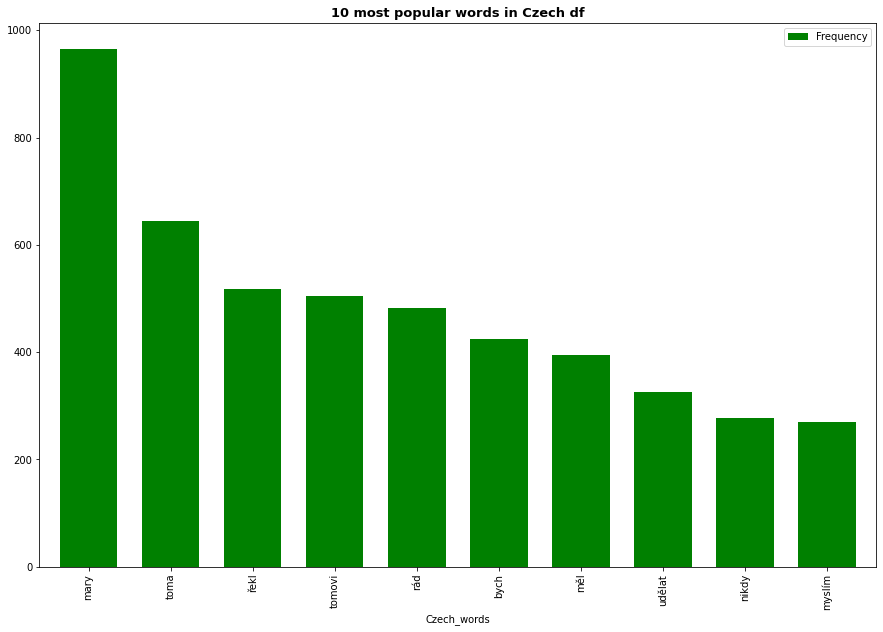

In [40]:
#Plot 10 most popular words in Czech dataframe after cleaning
number_top_words = 10
read_file = '/content/drive/My Drive/project/stopwords-cs.txt'
cs= pd.read_table(read_file, names =['stopwords'],header=None)
cs_stopwords = cs['stopwords'].tolist()
# RegEx for stopwords
re_cs_stopwords = r'\b(?:{})\b'.format('|'.join(cs_stopwords))
# replace '|'-->' ' and drop all stopwords
cs_words = (df.Czech
           .str.lower()
           .replace([r'\|', re_cs_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)
cs_df = pd.DataFrame(Counter(cs_words).most_common(number_top_words), columns=['Czech_words', 'Frequency'])
print(cs_df)
cs_df.set_index('Czech_words').plot(kind='bar', figsize = (15, 10), width = 0.7, color ='green')
plt.title('10 most popular words in Czech df', fontsize=13, fontweight='bold')
plt.show()

In [41]:
clean_df = df.copy()
clean_df

,English,Czech
0,hi,ahoj
1,run,běž
2,run,utíkej
3,who,kdo
4,wow,páni
...,...,...
24550,i honestly think its better to be a failure at...,upřímně si myslím že je lepší pohořet na něčem...
24551,when tom was working on the dairy farm he had ...,když tom pracoval na mléčném statku musel vstá...
24552,tom was sad when he discovered that mary was a...,tom byl smutný když objevil že mary je zlatoko...
24553,he was caught by the police three days later t...,byl dopaden policií o tři dny později když se ...


In [42]:
#We need to add 'start' and 'end' to Czech sentences. The tags will help the model to know when to start the translation and when to end the translation
clean_df.Czech = clean_df.Czech.apply(lambda i: 'START ' + i + ' END')
clean_df

,English,Czech
0,hi,START ahoj END
1,run,START běž END
2,run,START utíkej END
3,who,START kdo END
4,wow,START páni END
...,...,...
24550,i honestly think its better to be a failure at...,START upřímně si myslím že je lepší pohořet na...
24551,when tom was working on the dairy farm he had ...,START když tom pracoval na mléčném statku muse...
24552,tom was sad when he discovered that mary was a...,START tom byl smutný když objevil že mary je z...
24553,he was caught by the police three days later t...,START byl dopaden policií o tři dny později kd...


In [43]:
#Check max length of sentence after cleaning
eng_length = []
cs_length = []
for i in clean_df.English:
    eng_length.append(len(i.split(' ')))
eng_max_length = max(eng_length)
for i in clean_df.Czech:
    cs_length.append(len(i.split(' ')))
cs_max_length = max(cs_length)
print("Maximum length of English sentence:", eng_max_length)
print("Maximum length of Czech sentence:", cs_max_length)



Maximum length of English sentence: 26
Maximum length of Czech sentence: 24


# Model

In [44]:
#Before split our data,we need to shuffle the dataset. It will help to avoid any element of bias/patterns in the split datasets before training our model.
from sklearn.utils import shuffle
shuffled_df = shuffle(clean_df)
shuffled_df

,English,Czech
7068,weve had a tough week,START měli jsme náročný týden END
18249,i dont want to spend time with tom,START nechci trávit čas s tomem END
5247,tom promised to help,START tom slíbil že pomůže END
3194,i like your garden,START líbí se mi vaše zahrada END
1782,he cheated on me,START podváděl mě END
...,...,...
16409,there is something you must know,START je tu něco co musíš vědět END
4774,i know where to hide,START vím kde se schovat END
10560,i went by there last night,START stavil jsem se tam včera večer END
10702,life is like a soap bubble,START život je jako mýdlová bublina END


In [45]:
input_text = shuffled_df['English']
target_text = shuffled_df['Czech']

In [46]:
#Assign target
X= input_text
y = target_text

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #random_state=42

In [48]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (17188,) (17188,)
Test (7367,) (7367,)


In [49]:
X_train[0], y_train[0]

('hi', 'START ahoj END')

In [50]:
def max_length(data):
  max_len = max([len(i.split(' ')) for i in data])
  return max_len

In [51]:
#Training data
max_length_english = max_length(X_train)
max_length_czech = max_length(y_train)
max_length_english, max_length_czech

(26, 24)

In [52]:
#Test data
max_length_english_test = max_length(X_test)
max_length_czech_test = max_length(y_test)
max_length_english_test, max_length_czech_test

(22, 23)

In [53]:
#Tokenization and padding
#https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
#We need to convert string input to a numerical list using tokenization. We can turn each character into a number or each word into a number. These are called character and word ids, respectively. Character ids are used for character level models that generate text predictions for each character. A word level model uses word ids that generate text predictions for each word.
#Also, we need to use padding because when batching the sequence of word ids together, each sequence needs to be the same length. Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

#English
english_tokenizer = Tokenizer()
english_tokenizer.fit_on_texts(X_train)
eng_word_to_index = english_tokenizer.word_index #word to. Word to index allow to create a dictionary which has all the unique words(terms) as keys with a corresponding unique ID as values
eng_index_to_word = english_tokenizer.index_word #index to word. Index to word is the reverse of word to index. It has the unique IDs as keys and their corresponding words(terms) as values
vocab_size_input = len(eng_word_to_index) + 1

X_train = english_tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_length_english, padding='post')
X_test = english_tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_length_english, padding='post')

#Czech
czech_tokenizer = Tokenizer()
czech_tokenizer.fit_on_texts(y_train)
cz_word_to_index = czech_tokenizer.word_index #word to index
cz_index_to_word = czech_tokenizer.index_word #index to word
vocab_size_target = len(cz_word_to_index) + 1

y_train = czech_tokenizer.texts_to_sequences(y_train)
y_train = pad_sequences(y_train, maxlen=max_length_czech, padding='post')
y_test = czech_tokenizer.texts_to_sequences(y_test)
y_test = pad_sequences(y_test, maxlen = max_length_czech, padding='post')

vocab_size_input, vocab_size_target

(5176, 11574)

In [54]:
X_train[0], y_train[0]

(array([  1,  35,  72,   3,  44,   3, 155,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=int32),
 array([  1,   3, 698, 379,  18, 117,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32))

In [55]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (17188, 26) (17188, 24)
Test (7367, 26) (7367, 24)


In [56]:
from keras import backend as K 
K.clear_session() 

In [57]:
#Set parameters for model
#train_samples = len(X_train)
#val_samples = len(X_test)
#batch_size = 64
#epochs = 50
latent_dim =500

In [58]:
#Encoder
#The encoder creates a matrix representation of the sentence. The encoder will encode the input sentences. We pass the imput through the input layer. The first hidden layer will be the embeddinglayer. An embedding is a vector representation of the word that is close to similar words in n-dimensional space, where the n represents th size of the embedding vectors.
#https://github.com/nageshsinghc4/Neural-machine-translation-NMT/blob/master/neural-machine-translation-attention-mechanism%20(2).ipynb
#https://stackabuse.com/python-for-nlp-neural-machine-translation-with-seq2seq-in-keras/
#https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-sequence-to-sequence-modelling-with-attention-part-i/
#https://stackoverflow.com/questions/62357239/add-attention-layer-to-seq2seq-model
#https://www.tensorflow.org/guide/keras/masking_and_padding#masking
from keras.layers import Input, LSTM, Embedding, Dense
encoder_inputs = Input(shape=(max_length_english,)) 
enc_emb = Embedding(vocab_size_input, latent_dim,trainable=True)(encoder_inputs)
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) #state_h is a hidden state, state_c is cell state
#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [59]:
#Attention Layer (Bahdanau Attention) 
#The mechanism will allow the model to focus and place more “Attention” on the relevant parts of the input sequence as needed. The Attention Mechanism directly addresses this issue as it retains and utilises all the hidden states of the input sequence during the decoding process.It creates a unique mapping between each time step of the decoder output to all the encoder hidden states.
#https://machinelearningmastery.com/attention-long-short-term-memory-recurrent-neural-networks/
#https://blog.floydhub.com/attention-mechanism/
#https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/
#https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/
#https://medium.com/analytics-vidhya/neural-machine-translation-using-bahdanau-attention-mechanism-d496c9be30c3
#https://www.tensorflow.org/tutorials/text/nmt_with_attention
#https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/

import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [60]:
#Decoder
#The decoder takes the matrix (which the encoder creates) as input and predicts the translation as output. We create an input layer for the decoder inputs. Embedding will be the first hidden layer. The LSTM layer will return output sequeces as well as the internal states. The internal states will be used only during the inference phase and will not be used during the training phase.LSTM in the decoder takes input from the embedding layer and the encoder states. We will aplly different activation functions to the Dense layer to see which one will better generate the decoder output.
#https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
#https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-sequence-to-sequence-modelling-with-attention-part-i/
from keras.layers import TimeDistributed
from keras.layers import Concatenate
decoder_inputs = Input(shape=(None,)) #decoder_token))
dec_emb_layer = Embedding(vocab_size_target, latent_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences = True, return_state = True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
#Dense Layer
decoder_dense = TimeDistributed(Dense(vocab_size_target, activation = 'softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)


In [61]:
#Define the model
#The model will take encoder and decoder inputs top output decoder output
from keras.models import Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [62]:
#Compile the model
#The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. 
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
optimizer = 'rmsprop' #SGD(lr=0.1)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 26)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 26, 500)      2588000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 26, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

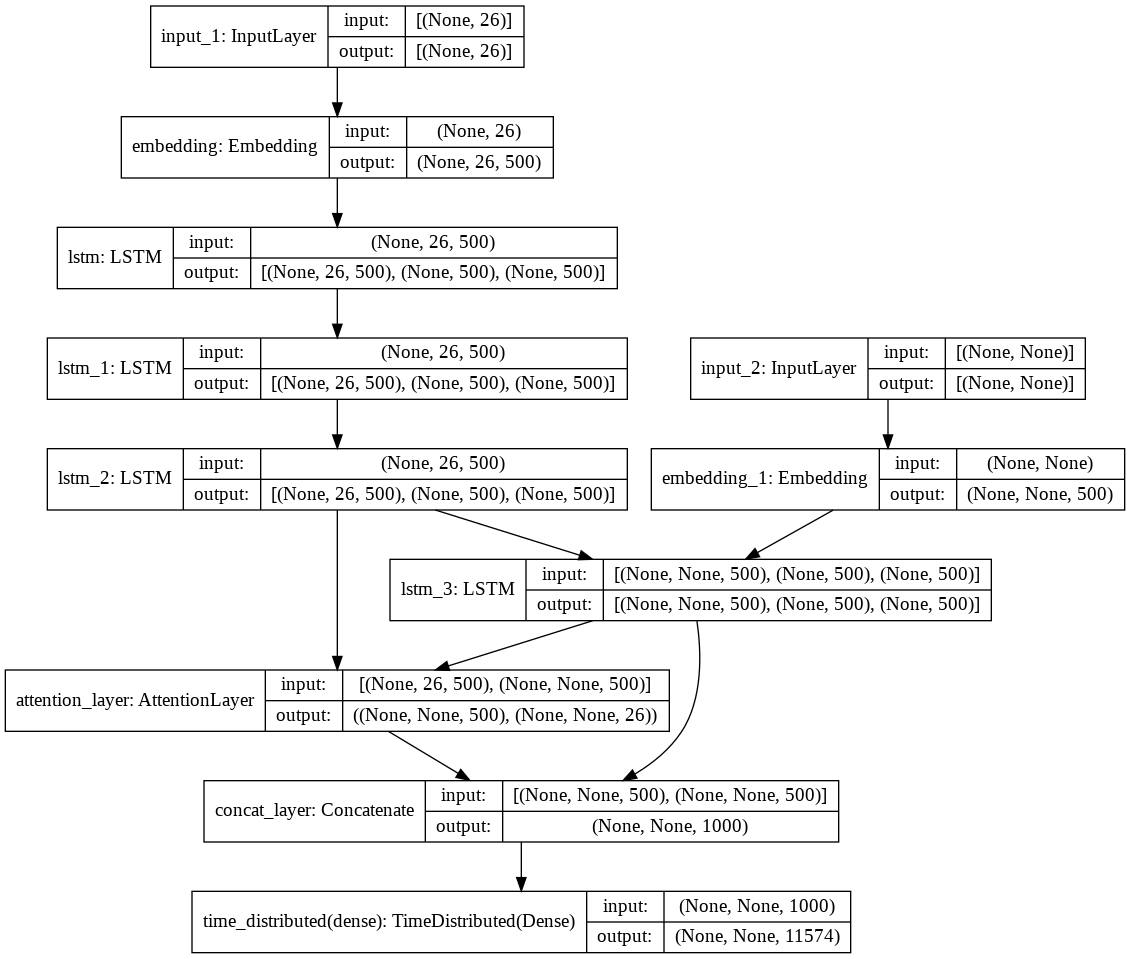

In [63]:
#Plot the model
#https://machinelearningmastery.com/define-encoder-decoder-sequence-sequence-model-neural-machine-translation-keras/
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_eng_cs.png', show_shapes=True)

In [64]:
#Set parameters for model
#https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/
#When training a large network, there will be a point during training when the model will stop generalizing and start learning the statistical noise in the training dataset. Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set. To solve this problem we will use EarlyStopping.  During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped.
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size = 256
epochs = 50
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [65]:
#https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/#:~:text=Teacher%20forcing%20works%20by%20using,output%20generated%20by%20the%20network.
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1],1)[:,1:], 
                    epochs=epochs, 
                    callbacks=[es],
                    batch_size=batch_size,
                    validation_data = ([X_test, y_test[:,:-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

Epoch 1/50
68/68 [==============================] - 44s 525ms/step - loss: 2.8306 - accuracy: 0.7050 - val_loss: 1.4186 - val_accuracy: 0.8080
Epoch 2/50
68/68 [==============================] - 33s 492ms/step - loss: 1.5349 - accuracy: 0.7980 - val_loss: 1.3369 - val_accuracy: 0.8122
Epoch 3/50
68/68 [==============================] - 33s 488ms/step - loss: 1.4274 - accuracy: 0.8025 - val_loss: 1.2838 - val_accuracy: 0.8158
Epoch 4/50
68/68 [==============================] - 33s 492ms/step - loss: 1.3139 - accuracy: 0.8102 - val_loss: 1.2153 - val_accuracy: 0.8251
Epoch 5/50
68/68 [==============================] - 33s 488ms/step - loss: 1.2112 - accuracy: 0.8180 - val_loss: 1.1631 - val_accuracy: 0.8271
Epoch 6/50
68/68 [==============================] - 33s 488ms/step - loss: 1.1119 - accuracy: 0.8244 - val_loss: 1.1236 - val_accuracy: 0.8321
Epoch 7/50
68/68 [==============================] - 33s 491ms/step - loss: 1.0218 - accuracy: 0.8315 - val_loss: 1.0858 - val_accuracy: 0.8362

In [66]:
print(history.history.keys())  

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


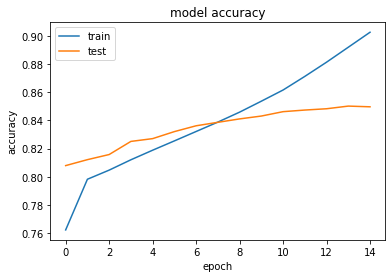

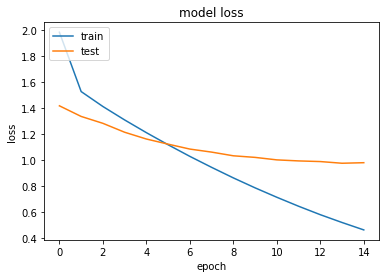

In [67]:
# summarize history for accuracy
plt.figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [68]:
model.save_weights('seq2seq_eng-cz_50epochs.h5')


In [69]:
test_loss, test_acc = model.evaluate([X_test, y_test[:,:-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:] , verbose=1)

231/231 [==============================] - 6s 28ms/step - loss: 0.9810 - accuracy: 0.8496


# Inference (sampling)

In [70]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.load_weights('seq2seq_eng-cz_50epochs.h5')

In [71]:
#https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu#data-preparation
#We need to encode the input sequence to get context vectors
latent_dim=500
#Load encoder inputs
encoder_inputs = model.input[0]
#Load encoder outputs
encoder_outputs, state_h, state_c = model.layers[6].output
#Encoder model
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
print(encoder_inputs.shape)

(None, 26)


In [72]:
#Decoder setup
#https://keras.io/examples/nlp/lstm_seq2seq/
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(26,latent_dim))
#Embeddings of the decoder sequence
decoder_inputs = model.layers[3].output
dec_emb_layer = model.layers[5]
dec_emb2= dec_emb_layer(decoder_inputs)
# Set the initial states to the states from the previous time step (we need it to predict the next word in the sequence)
decoder_lstm = model.layers[7]
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
#Attention inference
attn_layer = model.layers[8]
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])

concate = model.layers[9]
decoder_inf_concat = concate([decoder_outputs2, attn_out_inf])
# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_dense = model.layers[10]
decoder_outputs2 = decoder_dense(decoder_inf_concat)

#Decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c], 
    [decoder_outputs2] + [state_h2, state_c2])    
print(decoder_inputs.shape)                                      

(None, None)


In [73]:
#https://keras.io/examples/nlp/lstm_seq2seq/
#Function to perfrom the process of decoding a given input sequence
def decode_sequence(input_seq):
  #encode the input as state vectors
  e_out, e_h, e_c = encoder_model.predict(input_seq)
  #generate empty target sequence of length 1 with only the start word
  target_seq = np.zeros((1, 1))
  target_seq[0, 0] = cz_word_to_index['start']
  #output loop for a batch of sequences
  stop_condition = False
  decoded_sentence = ''
  while not stop_condition:
    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    #sample a token, add the corresponding word to the decoded sequence
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    if sampled_token_index == 0:
      break
    else:
      sampled_token = cz_index_to_word[sampled_token_index]
      if(sampled_token!='end'):
        decoded_sentence += ' '+sampled_token
      #exit condition: either hitting max length or find stop word
      if (sampled_token == 'end' or 
        len(decoded_sentence.split()) >= (26-1)):
        stop_condition = True
    #update the target sequence of length 1
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = sampled_token_index
    #update states
    e_h, e_c = h, c
  return decoded_sentence

In [74]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=cz_word_to_index['start']) and i!=cz_word_to_index['end']):
        newString=newString+cz_index_to_word[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+eng_index_to_word[i]+' '
    return newString

In [75]:
#Predictions
for i in range(10):
  
  print("Input English sentence:",seq2text(X_test[i]))
  print("Actual Czech sentence:",seq2summary(y_test[i]))
  print("Predicted Czech transaltion:",decode_sequence(X_test[i].reshape(1,26)))
  print("\n")

Input English sentence: i will do anything for you 
Actual Czech sentence: udělám pro tebe cokoliv 
Predicted Czech transaltion:  udělám ti pro tebe


Input English sentence: we shouldnt complain 
Actual Czech sentence: neměli bychom si stěžovat 
Predicted Czech transaltion:  jsme se tam neměli


Input English sentence: would you wear this 
Actual Czech sentence: vzala by sis tohle na sebe 
Predicted Czech transaltion:  oblékl bys to kočky


Input English sentence: her daughter is a nurse 
Actual Czech sentence: její dcera je zdravotní sestra 
Predicted Czech transaltion:  její dům je prázdný


Input English sentence: this is the dictionary my teacher recommended i buy 
Actual Czech sentence: tohle je slovník který mi doporučil ke koupi můj učitel 
Predicted Czech transaltion:  toto je to pero který jsem koupil


Input English sentence: tom is in australia visiting family 
Actual Czech sentence: tom je v austrálii na návštěvě rodiny 
Predicted Czech transaltion:  tom je v bostonu v bos

In [76]:
# BLEU Score
#'Measures how many words overlap in a given translation when compared to a reference translation, giving higher scores to sequential words.' (recall)
#https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
#https://machinelearningmastery.com/calculate-bleu-score-for-text-python/
from nltk.translate.bleu_score import sentence_bleu
for i in range(10):
  reference = seq2summary(y_test[i])
  candidate = decode_sequence(X_test[i].reshape(1,26))
score = sentence_bleu(reference, candidate)
print(score)

0.8914703664390793


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



In [77]:
#Cumulative N-Gram Scores
#Cumulative scores refer to the calculation of individual n-gram scores at all orders from 1 to n and weighting them by calculating the weighted geometric mean.
print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

Cumulative 1-gram: 0.631579
Cumulative 2-gram: 0.794719
Cumulative 3-gram: 0.859293
Cumulative 4-gram: 0.891470


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



Resources
https://dashayushman.github.io/tutorials/2017/08/19/neural-language-model.html
https://ruder.io/word-embeddings-1/
https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/
https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/
https://towardsdatascience.com/neural-machine-translation-with-python-c2f0a34f7dd
https://github.com/nageshsinghc4/Neural-machine-translation-NMT/blob/master/neural-machine-translation-attention-mechanism%20(2).ipynb
https://www.geeksforgeeks.org/activation-functions-neural-networks/
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-sequence-to-sequence-modelling-with-attention-part-i/
https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b
https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
https://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/
https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
https://stackoverflow.com/questions/62357239/add-attention-layer-to-seq2seq-model
https://keras.io/examples/nlp/lstm_seq2seq/
https://www.tensorflow.org/guide/keras/masking_and_padding#masking
https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu
https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu#data-preparation
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/#:~:text=Teacher%20forcing%20works%20by%20using,output%20generated%20by%20the%20network.
https://machinelearningmastery.com/attention-long-short-term-memory-recurrent-neural-networks/
https://blog.floydhub.com/attention-mechanism/
https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/
https://medium.com/analytics-vidhya/
https://blog.floydhub.com/attention-mechanism/
https://towardsdatascience.com/attn-illustrated-attention-5ec4ad276ee3
neural-machine-translation-using-bahdanau-attention-mechanism-d496c9be30c3
https://www.tensorflow.org/tutorials/text/nmt_with_attention
https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/
https://github.com/LaurentVeyssier/Machine
-translation-English-French-with-Deep-neural-Network/blob/main/machine_translation.ipynb
https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/

